<a href="https://colab.research.google.com/github/JackSandford/ECK/blob/main/Self_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data

In [14]:
import os
import pandas as pd
import json 
from google.colab import drive
import matplotlib.pyplot as plt

def mount_drive():
  drive.mount('/content/drive', force_remount=True)
  project_dir = "/content/drive/MyDrive/OneHourOfData"
  return project_dir

def unmount_drive():
  drive.flush_and_unmount()
  print('Drive Unmounted')

def get_file_names(project_dir):
  path = os.path.join(os.getcwd(),project_dir)
  filenames = [os.path.join(path,i) for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
  return filenames


project_dir = mount_drive()

filenames = get_file_names(project_dir)
filenames = filenames[:6]

Mounted at /content/drive


In [2]:
regs = pd.read_csv('https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/bus_regs.csv')
ohod = pd.read_json('/content/drive/MyDrive/OneHourOfData/busdata_22-09-07_08-07-48.json')

Creating a pie chart showing percentages of each type of bus

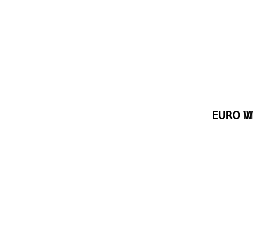

In [15]:
def types_of_buses():
  euro3buses = []
  euro4buses = []
  euro5buses = []
  euro6buses = []
  mvj = pd.json_normalize(ohod.MonitoredVehicleJourney)
  euro3regs = regs[regs['Emission Class'] == 'EURO III']
  euro4regs = regs[regs['Emission Class'] == 'EURO IV']
  euro5regs = regs[regs['Emission Class'] == 'EURO V']
  euro6regs = regs[regs['Emission Class'] == 'EURO VI']
  for reg in mvj['VehicleRef']:
    if reg in euro3regs['Last tracked']:
      euro3buses.append(reg)
    elif reg in euro4regs['Last tracked']:
      euro4buses.append(reg)
    elif reg in euro5regs['Last tracked']:
      euro5buses.append(reg)
    elif reg in euro6regs['Last tracked']:
      euro6buses.append(reg)
  numbersbuses = (len(euro3buses), len(euro4buses), len(euro5buses), len(euro6buses))
  keys = ('EURO III', 'EURO IV', 'EURO V', 'EURO VI')
  plt.pie(numbersbuses, labels = keys)
types_of_buses()

#display(euro3regs)